In [2]:
# EDA
import pandas as pd 
import pingouin as pg
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.preprocessing  import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Otmization of Hyperparameters
import optuna

In [3]:
df_segmento = pd.read_csv('datasets\segmentos_clientes.csv')

## EDA

In [4]:
df_segmento.head()

,atividade_economica,faturamento_mensal,numero_de_funcionarios,localizacao,idade,inovacao,segmento_de_cliente
0,Comércio,713109.95,12,Rio de Janeiro,6,1,Bronze
1,Comércio,790714.38,9,São Paulo,15,0,Bronze
2,Comércio,1197239.33,17,São Paulo,4,9,Silver
3,Indústria,449185.78,15,São Paulo,6,0,Starter
4,Agronegócio,1006373.16,15,São Paulo,15,8,Silver


In [5]:
df_segmento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   atividade_economica     500 non-null    object 
 1   faturamento_mensal      500 non-null    float64
 2   numero_de_funcionarios  500 non-null    int64  
 3   localizacao             500 non-null    object 
 4   idade                   500 non-null    int64  
 5   inovacao                500 non-null    int64  
 6   segmento_de_cliente     500 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 27.5+ KB


In [6]:
# Verificando valores possíveis para a variável segmento_de_cliente
df_segmento['segmento_de_cliente'].unique()

array(['Bronze', 'Silver', 'Starter', 'Gold'], dtype=object)

In [12]:
# Contando a quantidade de valores 
contagem_target = df_segmento.value_counts('segmento_de_cliente')
contagem_target

segmento_de_cliente
Silver     260
Bronze     202
Starter     22
Gold        16
Name: count, dtype: int64

In [13]:
lista_segmentos = ['Starter', 'Bronze', 'Silver', 'Gold']

In [15]:
px.bar(contagem_target, color=contagem_target.index, category_orders={'segmento_de_cliente': lista_segmentos})

c:\Users\Luiza\anaconda3\lib\site-packages\plotly\express\_core.py:1985: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [16]:
percentual_target = contagem_target / len(df_segmento) * 100
px.bar(percentual_target, color=percentual_target.index, category_orders={'segmento_de_cliente': lista_segmentos})

c:\Users\Luiza\anaconda3\lib\site-packages\plotly\express\_core.py:1985: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [17]:
crosstab_localizacao = pd.crosstab(df_segmento['localizacao'], df_segmento['segmento_de_cliente'], margins=True)[lista_segmentos].reset_index()

tabela_localizacao = ff.create_table(crosstab_localizacao)

tabela_localizacao.show()

In [18]:
crosstab_localizacao = pd.crosstab(df_segmento['atividade_economica'], df_segmento['segmento_de_cliente'], margins=True)[lista_segmentos].reset_index()

tabela_localizacao = ff.create_table(crosstab_localizacao)

tabela_localizacao.show()

In [19]:
px.histogram(df_segmento, x='idade')

In [20]:
px.histogram(df_segmento, x='faturamento_mensal')

In [22]:
px.box(df_segmento, x='segmento_de_cliente', y='idade', color='segmento_de_cliente', category_orders={'segmento_de_cliente': lista_segmentos})

c:\Users\Luiza\anaconda3\lib\site-packages\plotly\express\_core.py:1985: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [23]:
px.box(df_segmento, x='segmento_de_cliente', y='faturamento_mensal', color='segmento_de_cliente', category_orders={'segmento_de_cliente': lista_segmentos})

c:\Users\Luiza\anaconda3\lib\site-packages\plotly\express\_core.py:1985: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [32]:
# Teste de Qui-Quadrado
# H0: as variaveis são independentes
# H1: as variaveis são dependentes
# Se p-valor < 0.05 rejeitamos a hipótese nula

valor_esperado, valor_observado, estatisticas = pg.chi2_independence(df_segmento, 'segmento_de_cliente', 'inovacao')

c:\Users\Luiza\anaconda3\lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on observed frequencies.

c:\Users\Luiza\anaconda3\lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on expected frequencies.

c:\Users\Luiza\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:7169: RuntimeWarning:

divide by zero encountered in power

c:\Users\Luiza\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:7169: RuntimeWarning:

invalid value encountered in multiply

c:\Users\Luiza\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:7166: RuntimeWarning:

divide by zero encountered in divide



In [33]:
# Valor esperado
# É a frequencia que seria esperada se não houvesse relação entre as variáveis

valor_esperado

inovacao,0,1,2,3,4,5,6,7,8,9
segmento_de_cliente,,,,,,,,,,
Bronze,21.008,23.028,22.624,19.392,17.372,17.372,21.816,21.412,18.988,18.988
Gold,1.664,1.824,1.792,1.536,1.376,1.376,1.728,1.696,1.504,1.504
Silver,27.040,29.640,29.120,24.960,22.360,22.360,28.080,27.560,24.440,24.440
Starter,2.288,2.508,2.464,2.112,1.892,1.892,2.376,2.332,2.068,2.068


In [34]:
# Valor Observado
# É a frequencia real dos dados coletados
valor_observado

inovacao,0,1,2,3,4,5,6,7,8,9
segmento_de_cliente,,,,,,,,,,
Bronze,36,44,32,22,12,14,15,12,9,6
Gold,0,0,0,0,0,3,0,5,4,4
Silver,10,5,20,25,30,25,38,36,34,37
Starter,6,8,4,1,1,1,1,0,0,0


In [35]:
# Estatisticas
estatisticas.round(5)

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.00000,164.29399,27.0,0.0,0.33095,0.99850
1,cressie-read,0.66667,165.49946,27.0,0.0,0.33216,0.99861
2,log-likelihood,0.00000,181.48878,27.0,0.0,0.34784,0.99951
3,freeman-tukey,-0.50000,NaN,27.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.00000,inf,27.0,0.0,inf,1.00000
5,neyman,-2.00000,NaN,27.0,NaN,NaN,NaN


As variaveis localização e segmento de cliente são Independetes. Qui-Quadrado (p-value = 0.81714)
As variaveis atividade economica e segmento de cliente são Independetes. Qui-Quadrado (p-value = 0.35292)
As variaveis inovação e segmento de cliente não são Independetes. Qui-Quadrado (p-value = 0.0)

## Treinamento do modelo

In [36]:
X = df_segmento.drop(columns='segmento_de_cliente')
y = df_segmento['segmento_de_cliente']

In [37]:
# Pipeline
# onehotencoder -> variaveis categoricas

# lista de variaveis categoricas
categorical_features = ['atividade_economica', 'localizacao']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Pipeline com o preprocessor e o classificador
dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

## Validação Cruzada

In [38]:
# Cross Validation dado que as classes estão desbalanceadas

cv_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=51)
metrics_results = cross_validate(dt_model, X, y, cv=cv_folds, scoring=['accuracy'], return_estimator=True)

In [39]:
metrics_results

{'fit_time': array([0.04215527, 0.01494074, 0.00958347]),
 'score_time': array([0.0059731 , 0.00522327, 0.00398469]),
 'estimator': [Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('cat',
                                                    Pipeline(steps=[('imputer',
                                                                     SimpleImputer(strategy='most_frequent')),
                                                                    ('onehot',
                                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                                    ['atividade_economica',
                                                     'localizacao'])])),
                  ('classifier', DecisionTreeClassifier())]),
  Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('cat',
                                                    Pipeline(steps=[('imputer',
        

In [40]:
metrics_results['test_accuracy'].mean()

0.4739917754851743

In [ ]:
# Acurácia 
# total de predições corretas / total de predições


## Métricas

In [41]:
y_pred = cross_val_predict(dt_model, X, y, cv=cv_folds)

In [43]:
classification_report_str = classification_report(y, y_pred)

print(classification_report_str)

              precision    recall  f1-score   support

      Bronze       0.41      0.36      0.38       202
        Gold       0.00      0.00      0.00        16
      Silver       0.51      0.63      0.57       260
     Starter       0.00      0.00      0.00        22

    accuracy                           0.47       500
   macro avg       0.23      0.25      0.24       500
weighted avg       0.43      0.47      0.45       500



c:\Users\Luiza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Luiza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Luiza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



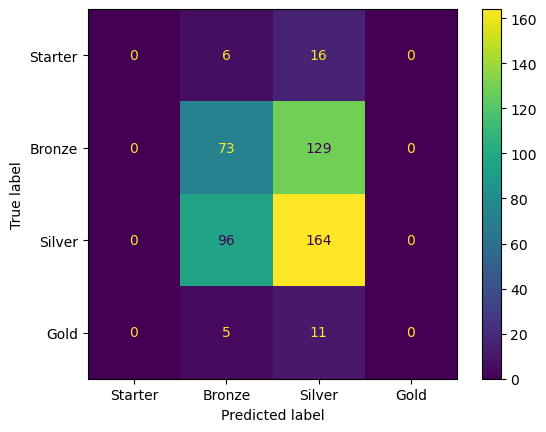

In [45]:
# confusion matrix
confusion_matrix_modelo = confusion_matrix(y, y_pred, labels=lista_segmentos)
disp = ConfusionMatrixDisplay(confusion_matrix_modelo, display_labels=lista_segmentos)
disp.plot()

## Tuning Hiperparâmetros

In [46]:
# Ajustar hiperparametros do modelo
# min_samples_leaf = minimo de instancias em cada folha
# max_depth = maxima profundidade da arvore

def decisiontree_optuna(trial):

    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_depth = trial.suggest_int('max_depth', 2, 8)

    dt_model.set_params(classifier__min_samples_leaf=min_samples_leaf)
    dt_model.set_params(classifier__max_depth=max_depth)

    scores = cross_val_score(dt_model, X, y, cv=cv_folds, scoring='accuracy')

    return scores.mean()

In [47]:
# automatizar os experimentos
estudo_decisiontree = optuna.create_study(direction='maximize')
estudo_decisiontree.optimize(decisiontree_optuna, n_trials=100)

[I 2024-07-04 11:17:12,633] A new study created in memory with name: no-name-73391577-7b28-4356-acba-ce3654980a3b
[I 2024-07-04 11:17:12,710] Trial 0 finished with value: 0.4679797032441142 and parameters: {'min_samples_leaf': 20, 'max_depth': 6}. Best is trial 0 with value: 0.4679797032441142.
[I 2024-07-04 11:17:12,826] Trial 1 finished with value: 0.4740518962075848 and parameters: {'min_samples_leaf': 11, 'max_depth': 2}. Best is trial 1 with value: 0.4740518962075848.
[I 2024-07-04 11:17:12,861] Trial 2 finished with value: 0.4679676790996321 and parameters: {'min_samples_leaf': 18, 'max_depth': 7}. Best is trial 1 with value: 0.4740518962075848.
[I 2024-07-04 11:17:12,901] Trial 3 finished with value: 0.4739917754851743 and parameters: {'min_samples_leaf': 15, 'max_depth': 6}. Best is trial 1 with value: 0.4740518962075848.
[I 2024-07-04 11:17:12,944] Trial 4 finished with value: 0.4739917754851743 and parameters: {'min_samples_leaf': 13, 'max_depth': 6}. Best is trial 1 with val

In [48]:
# Melhores parametros e melhor resultado
print(f'Melhor acurácia: {estudo_decisiontree.best_value}')
print(f'Melhores parametros: {estudo_decisiontree.best_params}')

Melhor acurácia: 0.4740518962075848
Melhores parametros: {'min_samples_leaf': 11, 'max_depth': 2}


## Visualizar a Árvore

In [49]:
# Preparar o conjunto de dados para treinar e conseguir visualizar 
X_train_tree = X.copy()
X_train_tree['localizacao_label'] = X_train_tree.localizacao.astype('category').cat.codes
X_train_tree['atividade_economica_label'] = X_train_tree.atividade_economica.astype('category').cat.codes
X_train_tree.drop(columns=['localizacao', 'atividade_economica'], axis=1, inplace=True)
X_train_tree.rename(columns={'localizacao_label': 'localizacao', 'atividade_economica_label': 'atividade_economica'}, inplace=True)
X_train_tree.head()


,faturamento_mensal,numero_de_funcionarios,idade,inovacao,localizacao,atividade_economica
0,713109.95,12,6,1,1,1
1,790714.38,9,15,0,2,1
2,1197239.33,17,4,9,2,1
3,449185.78,15,6,0,2,2
4,1006373.16,15,15,8,2,0


In [50]:
# Treinar o modelo com os melhores parametros
clf_decision_tree = DecisionTreeClassifier(min_samples_leaf=estudo_decisiontree.best_params['min_samples_leaf'], 
                                           max_depth=estudo_decisiontree.best_params['max_depth'])

y_train_tree = y.copy()

clf_decision_tree.fit(X_train_tree, y_train_tree)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=11)

[Text(0.5, 0.8333333333333334, 'inovacao <= 2.5\ngini = 0.563\nsamples = 500\nvalue = [202, 16, 260, 22]\nclass = Silver'),
 Text(0.25, 0.5, 'faturamento_mensal <= 425959.422\ngini = 0.482\nsamples = 165\nvalue = [112, 0, 35, 18]\nclass = Starter'),
 Text(0.125, 0.16666666666666666, 'gini = 0.26\nsamples = 13\nvalue = [2, 0, 0, 11]\nclass = Gold'),
 Text(0.375, 0.16666666666666666, 'gini = 0.421\nsamples = 152\nvalue = [110, 0, 35, 7]\nclass = Starter'),
 Text(0.75, 0.5, 'faturamento_mensal <= 549601.438\ngini = 0.474\nsamples = 335\nvalue = [90, 16, 225, 4]\nclass = Silver'),
 Text(0.625, 0.16666666666666666, 'gini = 0.459\nsamples = 37\nvalue = [26, 0, 7, 4]\nclass = Starter'),
 Text(0.875, 0.16666666666666666, 'gini = 0.416\nsamples = 298\nvalue = [64, 16, 218, 0]\nclass = Silver')]

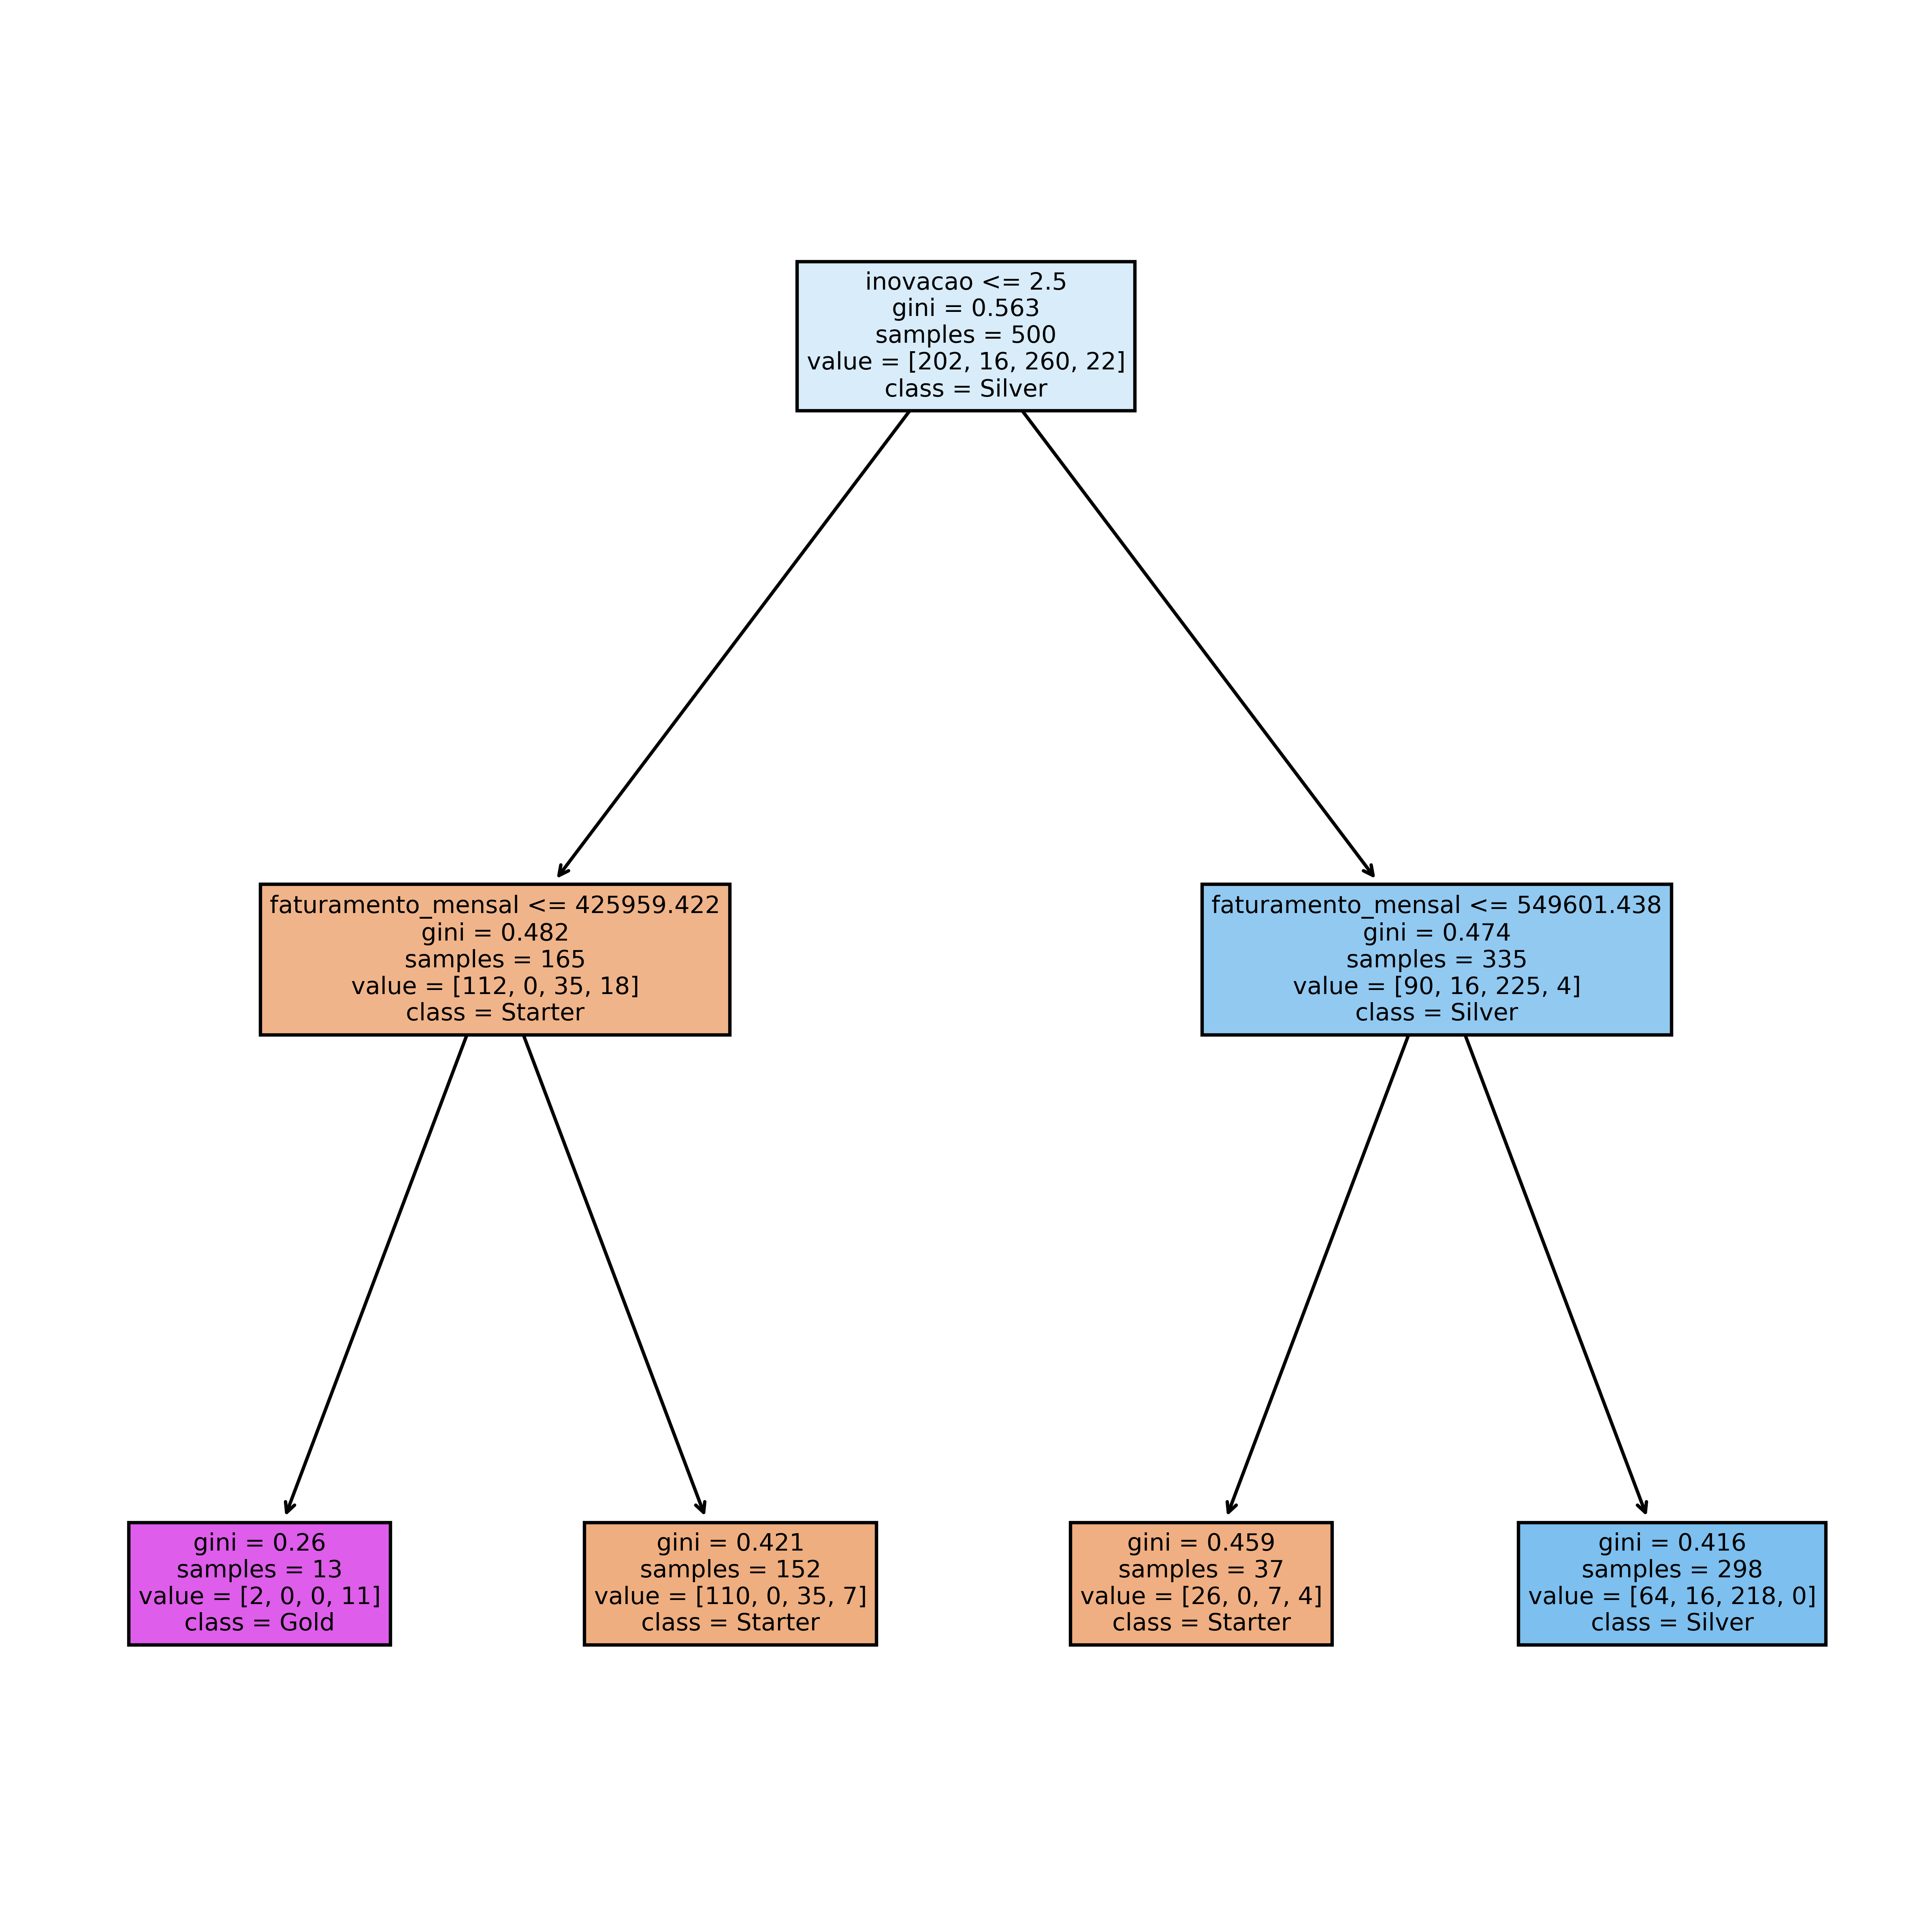

In [51]:
# Visualizar a árvore
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=600)

plot_tree(clf_decision_tree, 
          feature_names=X_train_tree.columns.to_numpy(), 
          class_names=lista_segmentos, 
          filled=True)

## Salvar o modelo

In [53]:
import joblib

# Criar pipeline com hiperparametros otimizados

dt_model_tunado = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(min_samples_leaf=estudo_decisiontree.best_params['min_samples_leaf'], 
                                          max_depth=estudo_decisiontree.best_params['max_depth']))
])

dt_model_tunado.fit(X, y)

joblib.dump(dt_model_tunado, 'model_classificacao_decision_tree.pkl')

['model_classificacao_decision_tree.pkl']

## Entregar modelo como app de predição batch (por arquivo)

In [56]:
import gradio as gr

modelo = joblib.load('model_classificacao_decision_tree.pkl')

def predict(arquivo):
    df_empresas = pd.read_csv(arquivo.name)

    y_pred = modelo.predict(df_empresas)

    df_segmentos = pd.DataFrame(y_pred, columns=['segmento_de_cliente'])
    df_predicoes = pd.concat([df_empresas, df_segmentos], axis=1)
    df_predicoes.to_csv('predicoes.csv', index=False)
    return './predicoes.csv'

demo = gr.Interface(predict,
                    gr.File(file_types=['.csv'], label='Arquivo CSV com as empresas'), 'file')

demo.launch()


Running on local URL:  http://127.0.0.1:7860
IMPORTANT: You are using gradio version 4.21.0, however version 4.29.0 is available, please upgrade.
--------

To create a public link, set `share=True` in `launch()`.
